# Analysing Labels: Examples

This notebook provides some simple examples exercises for working with data exported from the 
[ElasticSearch label index](../..).

For this example, we have downloaded a sample CSV export from Kibana. We'll first read the CSV using __Pandas__.

In [41]:
import pandas as pd 

df = pd.read_csv('./published_in_paris_labels_1700_1750.csv.gz', compression='gzip')
df

,title,creator,pub_date_text,date_text,pub_location,postocr_label,text,pub_type,related_place,pub_author,pub_title,scale,web_url,geometry,mapkurator_filename,external_id
0,Le Canada,"Du Val, Pierre, 1619-1683",1714.0,1677,Paris,COLLECTION,Collection,World Atlas,"North America, Canada","Placide de Sainte-Helene, 1648-1734', 'Du Val,...","Cartes de geographie par Le Rd. Pere Placide, ...","12,000,000",(empty),"{\n ""coordinates"": [\n -79.13188426460418,...",13031010.geojson,13031.010
1,Le Canada,"Du Val, Pierre, 1619-1683",1714.0,1677,Paris,RUMSEY,Rumsey,World Atlas,"North America, Canada","Placide de Sainte-Helene, 1648-1734', 'Du Val,...","Cartes de geographie par Le Rd. Pere Placide, ...","12,000,000",(empty),"{\n ""coordinates"": [\n -79.5609259870139,\...",13031010.geojson,13031.010
2,Le Canada,"Du Val, Pierre, 1619-1683",1714.0,1677,Paris,CARTOGRAPHY,Cartography,World Atlas,"North America, Canada","Placide de Sainte-Helene, 1648-1734', 'Du Val,...","Cartes de geographie par Le Rd. Pere Placide, ...","12,000,000",(empty),"{\n ""coordinates"": [\n -80.8706094202652,\...",13031010.geojson,13031.010
3,Le Canada,"Du Val, Pierre, 1619-1683",1714.0,1677,Paris,ASSOCIATES,",Associates,",World Atlas,"North America, Canada","Placide de Sainte-Helene, 1648-1734', 'Du Val,...","Cartes de geographie par Le Rd. Pere Placide, ...","12,000,000",(empty),"{\n ""coordinates"": [\n -80.31158263101047,...",13031010.geojson,13031.010
4,Le Canada,"Du Val, Pierre, 1619-1683",1714.0,1677,Paris,DAVID,David,World Atlas,"North America, Canada","Placide de Sainte-Helene, 1648-1734', 'Du Val,...","Cartes de geographie par Le Rd. Pere Placide, ...","12,000,000",(empty),"{\n ""coordinates"": [\n -79.90850714574016,...",13031010.geojson,13031.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22295,Le Comte de Flandre,"Du Val, Pierre, 1619-1683",1714.0,1690,Paris,FORTUNE,Fontune,World Atlas,"Belgium, Netherlands","Placide de Sainte-Helene, 1648-1734', 'Du Val,...","Cartes de geographie par Le Rd. Pere Placide, ...","207,000",(empty),"{\n ""coordinates"": [\n 4.293628690047719,\...",13031031.geojson,13031.031
22296,Le Comte de Flandre,"Du Val, Pierre, 1619-1683",1714.0,1690,Paris,TIERNEY,Lierned,World Atlas,"Belgium, Netherlands","Placide de Sainte-Helene, 1648-1734', 'Du Val,...","Cartes de geographie par Le Rd. Pere Placide, ...","207,000",(empty),"{\n ""coordinates"": [\n 4.296388637237424,\...",13031031.geojson,13031.031
22297,Le Comte de Flandre,"Du Val, Pierre, 1619-1683",1714.0,1690,Paris,POLLES,Volles,World Atlas,"Belgium, Netherlands","Placide de Sainte-Helene, 1648-1734', 'Du Val,...","Cartes de geographie par Le Rd. Pere Placide, ...","207,000",(empty),"{\n ""coordinates"": [\n 4.250436528594054,\...",13031031.geojson,13031.031
22298,Le Comte de Flandre,"Du Val, Pierre, 1619-1683",1714.0,1690,Paris,BENCHE,Binche,World Atlas,"Belgium, Netherlands","Placide de Sainte-Helene, 1648-1734', 'Du Val,...","Cartes de geographie par Le Rd. Pere Placide, ...","207,000",(empty),"{\n ""coordinates"": [\n 4.143678650406982,\...",13031031.geojson,13031.031


## Character Length Histogram

As a simple example, let's create histograms for the labels' character lenghts.

1. We pick the __text__ and __postocr_labels__ columns from the data frame
2. For each label, we get its length (number of characters)
3. We update a running counter to record how many labels of this length exist in our data 

In [43]:
def generate_char_histogram(strings, counts = {}):
  for string in strings:
    if (string):
      length = len(string)

      if length in counts:
          counts[length] += 1
      else:
          counts[length] = 1

  return counts

In [55]:
text = df['text'].astype(str).fillna('').tolist()
counts_text = generate_char_histogram(text)

post_ocr = df['postocr_label'].astype(str).fillna('').tolist()
counts_post_ocr = generate_char_histogram(post_ocr)

# Just as an example
counts_text

{10: 1306,
 6: 12320,
 11: 450,
 12: 254,
 5: 13366,
 8: 4554,
 4: 13480,
 2: 14456,
 7: 8216,
 9: 2630,
 3: 13142,
 1: 4928,
 13: 54,
 15: 16,
 22: 4,
 14: 18,
 17: 4,
 16: 2}

Next, we plot both histograms as a chart.

In [46]:
import matplotlib.pyplot as plt

def plot_histogram(dict, title):
  char_lengths = list(dict.keys())
  word_counts = list(dict.values())

  # create the histogram
  plt.bar(char_lengths, word_counts)

  # add labels and title
  plt.xlabel('Character length')
  plt.ylabel('Word count')
  plt.title(title)

  # show the plot
  plt.show()

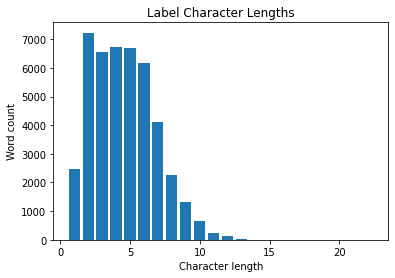

In [49]:
plot_histogram(counts_text, 'Label Character Lengths')

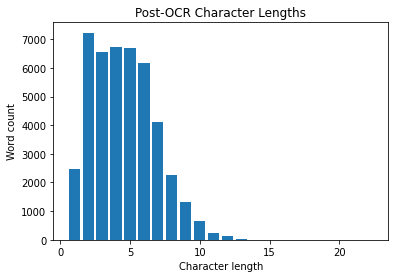

In [50]:
plot_histogram(counts_post_ocr, 'Post-OCR Character Lengths')

## Edit Distance

As another example, we will generate a histogram of the edit distance between the labels and their post-OCR corrected version. We will use the `distance` function from the `Levenshtein` Python package.

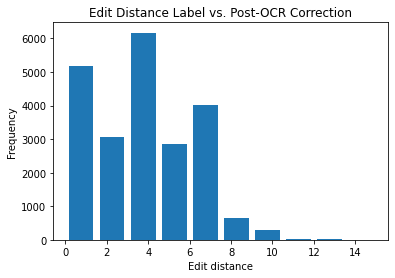

In [54]:
from Levenshtein import distance

distances = [distance(label, postocr) for label, postocr in zip(text, post_ocr)]

plt.hist(distances, rwidth=0.8)
plt.xlabel('Edit distance')
plt.ylabel('Frequency')
plt.title('Edit Distance Label vs. Post-OCR Correction')
plt.show()